In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


Load training and test set

In [3]:
data = '/content/drive/MyDrive/dataset/training_set'
data1 = '/content/drive/MyDrive/dataset/test_set'

Train set

Validation set /test set

In [4]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    data,seed = 123, image_size = (180,180), batch_size = 32
)

Found 8062 files belonging to 2 classes.


# New Section

In [5]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data1,seed = 123, image_size = (180,180), batch_size = 32
)

Found 2010 files belonging to 2 classes.


In [6]:
class_names = train.class_names
print(class_names)

class_names = validation.class_names
print(class_names)

['cats', 'dogs']
['cats', 'dogs']


Visualize the training data images

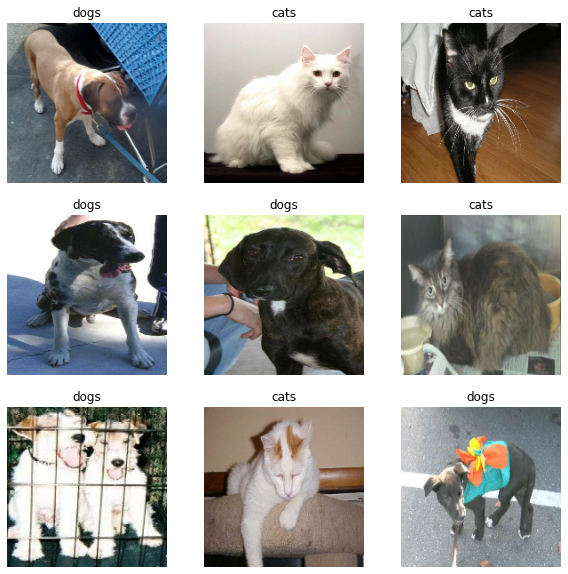

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Normalize the data

In [8]:
norm_layer = layers.experimental.preprocessing.Rescaling(1./255)

Create the model - CNN

In [9]:
classes = 2
img_height = 180
img_width = 180
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

Compile the model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

Train the model

In [12]:
epochs=1
history = model.fit(
  train,
  validation_data=validation,
  epochs=epochs
)

252/252 [==============================] - 812s 3s/step - loss: 0.6673 - accuracy: 0.6069 - val_loss: 0.5994 - val_accuracy: 0.6557


Predict


In [16]:

sunflower_url = "https://upload.wikimedia.org/wikipedia/commons/d/db/Tallinn_Zoo_Ovis_dalli_2.jpg"
sunflower_path = tf.keras.utils.get_file('Tallinn_Zoo_Ovis_dalli_2', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to dogs with a 62.36 percent confidence.
